In [1]:
import pandas as pd
import seaborn as sea
import numpy as np
import missingno as msno
import pandas_profiling 
from matplotlib import pyplot as plt

In [2]:
df2 = pd.read_csv('Archivos/AirQualityUCI/AirQualityUCI.csv', sep = ';', na_values = ["-200.0", "-200"])
df2 = df2.drop(columns = ['Unnamed: 15','Unnamed: 16'])
df2.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


# Univariate Analysis

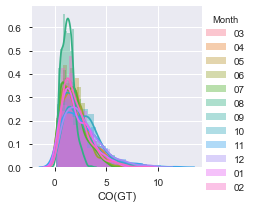

Miau


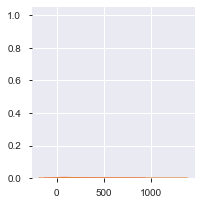

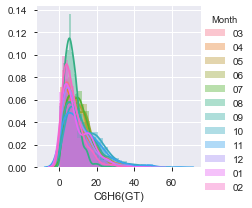

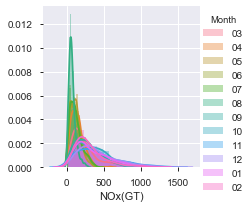

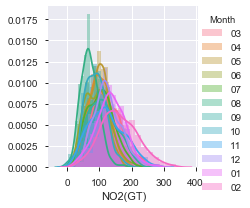

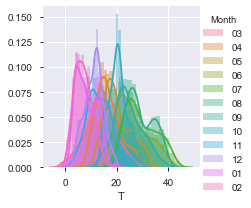

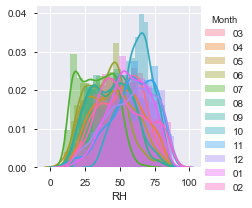

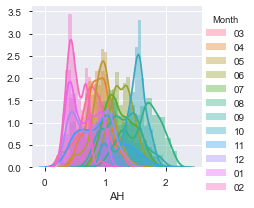

In [16]:
for column in df.columns[2:10]:
    try:
        g = sea.FacetGrid(df,hue = 'Month')
        g = g.map(sea.distplot, column)
        g = g.add_legend()
        plt.show()
    except:
        print('Miau')

# Certfied Analyzer vs Sensor

In [3]:
df2['CO(GT)'] = df2['CO(GT)'].str.replace(",",".").astype(float)
df2['C6H6(GT)'] = df2['C6H6(GT)'].str.replace(",",".").astype(float)
df2['T'] = df2['T'].str.replace(",",".").astype(float)
df2['RH'] = df2['RH'].str.replace(",",".").astype(float)
df2['AH'] = df2['AH'].str.replace(",",".").astype(float)
df2['CO(GT)'] = df2['CO(GT)'].replace(-200,np.nan)
df2['C6H6(GT)'] = df2['C6H6(GT)'].replace(-200,np.nan)
df2.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [4]:
df2 = df2[df2.Date.notna()] #Drop nan values

In [5]:
df2[df2.duplicated() == True ]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH


In [6]:
df2.shape[0], df2.shape[1] #Obvervaciones, Columnas

(9357, 15)

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           7674 non-null float64
PT08.S1(CO)      8991 non-null float64
NMHC(GT)         914 non-null float64
C6H6(GT)         8991 non-null float64
PT08.S2(NMHC)    8991 non-null float64
NOx(GT)          7718 non-null float64
PT08.S3(NOx)     8991 non-null float64
NO2(GT)          7715 non-null float64
PT08.S4(NO2)     8991 non-null float64
PT08.S5(O3)      8991 non-null float64
T                8991 non-null float64
RH               8991 non-null float64
AH               8991 non-null float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [8]:
df2['Month'] = df2['Date'].str.slice(3,5).astype(int)
df2['Year'] = df2['Date'].str.slice(6,10).astype(int)
df2.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month,Year
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,3,2004
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,3,2004
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,3,2004
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,3,2004
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,3,2004


In [9]:
df2.shape[0], df2.shape[1] #Obvervaciones, Columnas

(9357, 17)

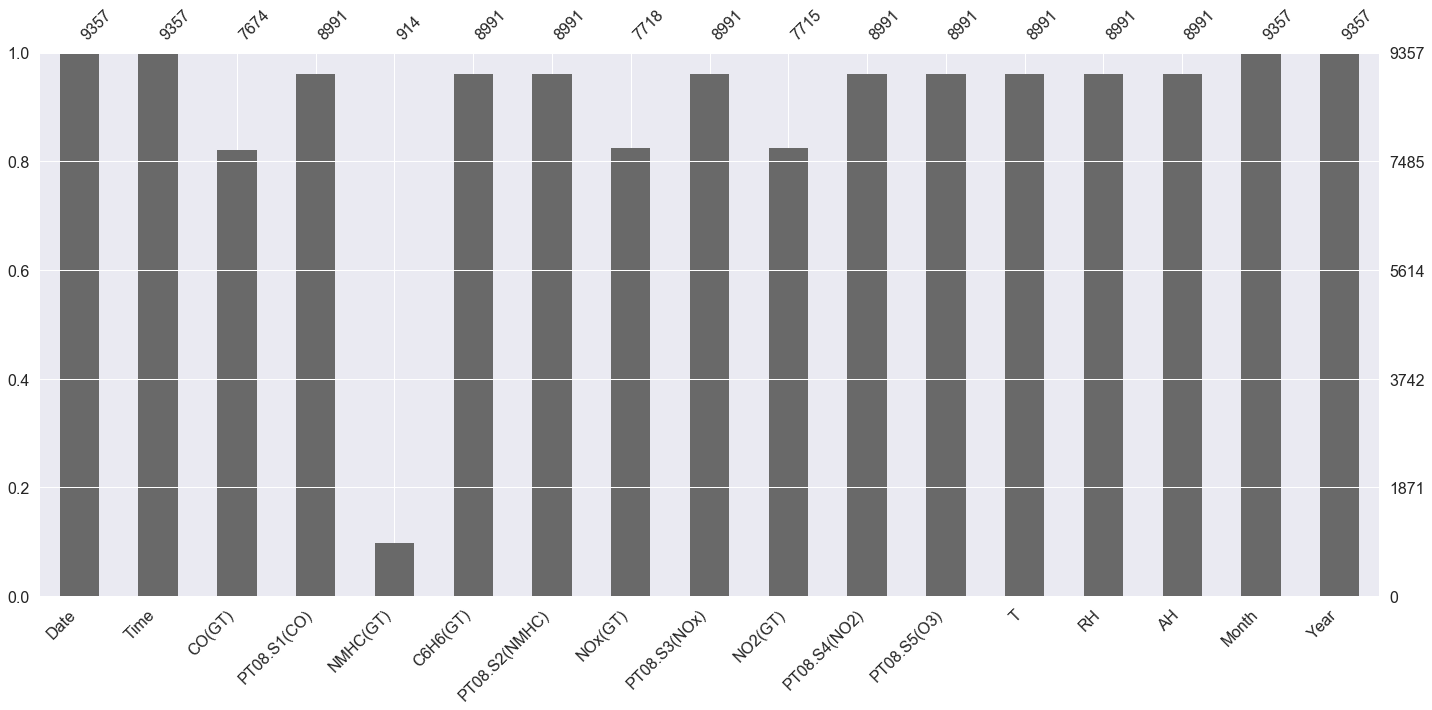

In [10]:
msno.bar(df2, labels = True)

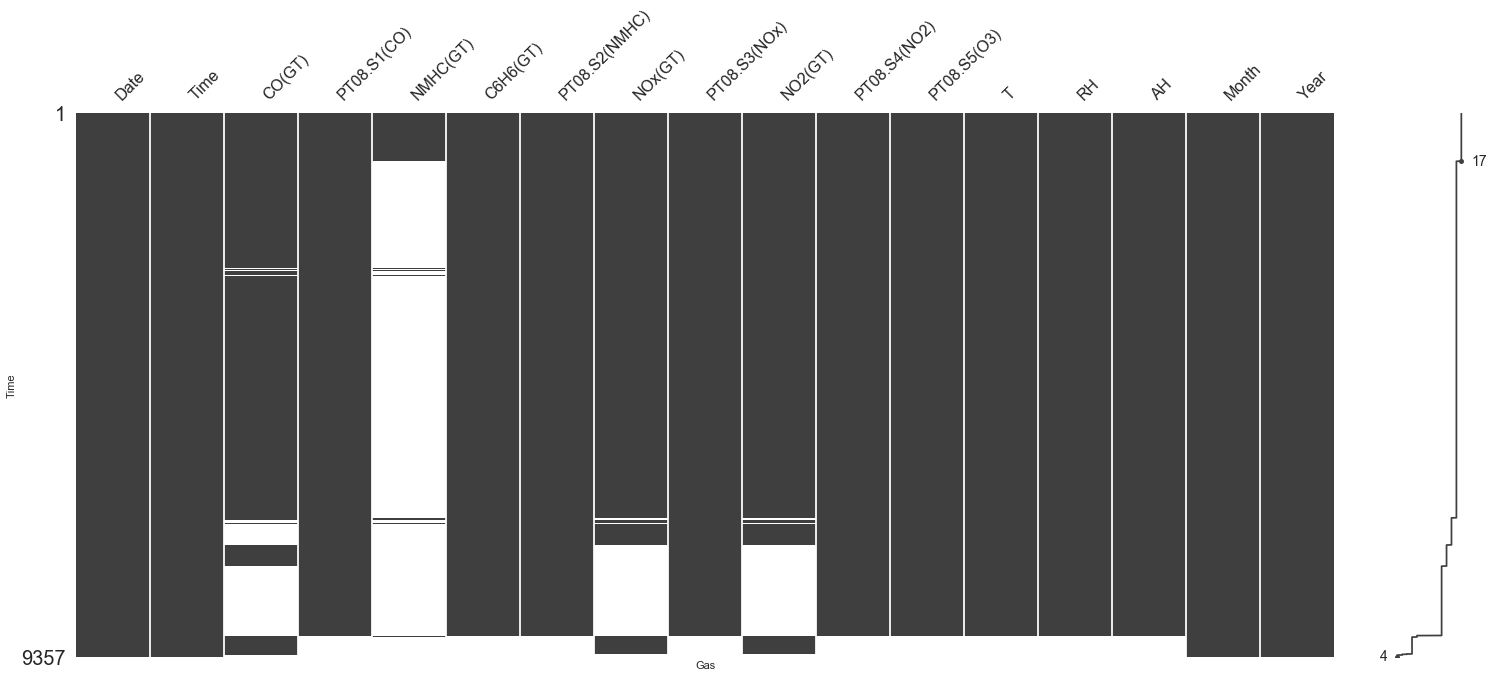

In [11]:
msno.matrix(df2, sort='descending')
plt.xlabel("Gas")
plt.ylabel("Time")
plt.show()

In [12]:
df2 = df2.drop(columns = ['NMHC(GT)', 'PT08.S2(NMHC)'])
df2.head(1)

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month,Year
0,10/03/2004,18.00.00,2.6,1360.0,11.9,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,3,2004


In [13]:
df2.skew()

CO(GT)          1.369753
PT08.S1(CO)     0.755907
C6H6(GT)        1.361532
NOx(GT)         1.715781
PT08.S3(NOx)    1.101729
NO2(GT)         0.621714
PT08.S4(NO2)    0.205389
PT08.S5(O3)     0.627864
T               0.309357
RH             -0.037928
AH              0.251388
Month           0.116099
Year            1.216851
dtype: float64

In [14]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
CO(GT),7674.0,2.152750,1.453252,0.1000,1.1000,1.8000,2.9000,11.900
PT08.S1(CO),8991.0,1099.833166,217.080037,647.0000,937.0000,1063.0000,1231.0000,2040.000
C6H6(GT),8991.0,10.083105,7.449820,0.1000,4.4000,8.2000,14.0000,63.700
NOx(GT),7718.0,246.896735,212.979168,2.0000,98.0000,180.0000,326.0000,1479.000
PT08.S3(NOx),8991.0,835.493605,256.817320,322.0000,658.0000,806.0000,969.5000,2683.000
NO2(GT),7715.0,113.091251,48.370108,2.0000,78.0000,109.0000,142.0000,340.000
PT08.S4(NO2),8991.0,1456.264598,346.206794,551.0000,1227.0000,1463.0000,1674.0000,2775.000
PT08.S5(O3),8991.0,1022.906128,398.484288,221.0000,731.5000,963.0000,1273.5000,2523.000
T,8991.0,18.317829,8.832116,-1.9000,11.8000,17.8000,24.4000,44.600
RH,8991.0,49.234201,17.316892,9.2000,35.8000,49.6000,62.5000,88.700


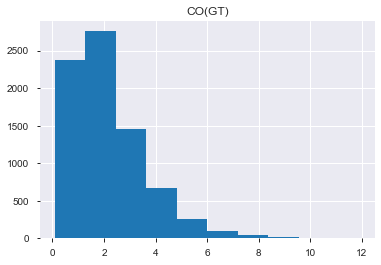

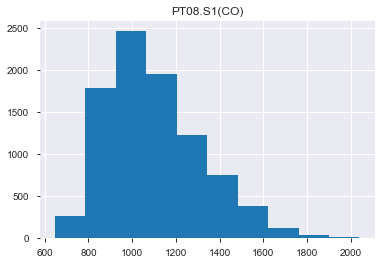

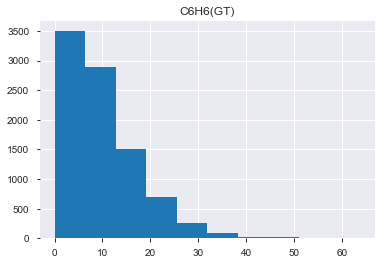

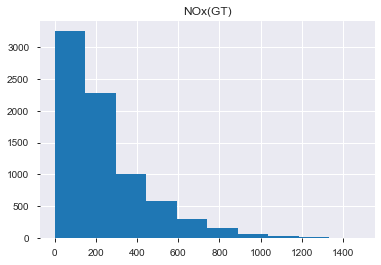

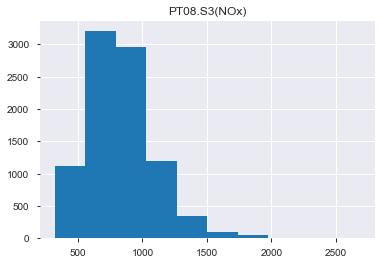

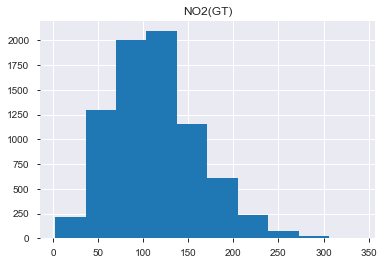

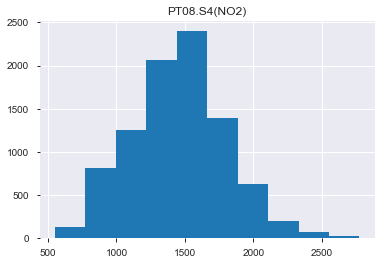

In [18]:
for column in df2.columns[2:9]:
    plt.title(column)
    df2[column].hist()
    plt.show()

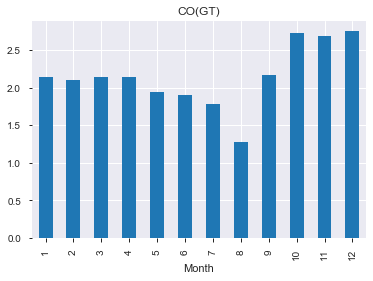

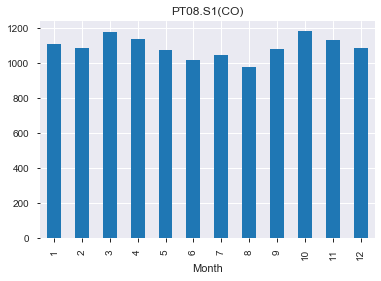

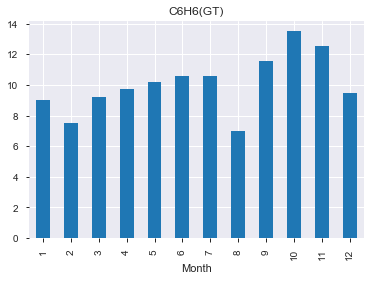

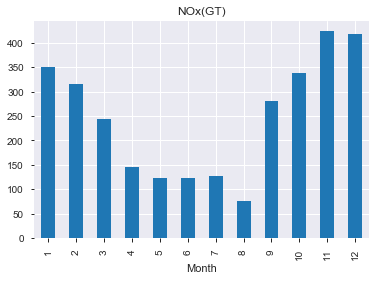

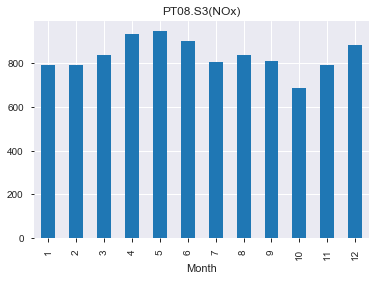

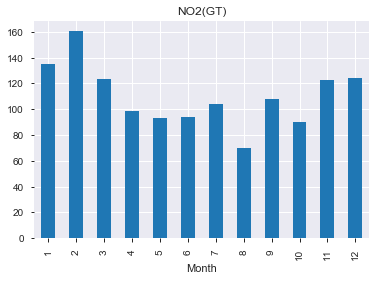

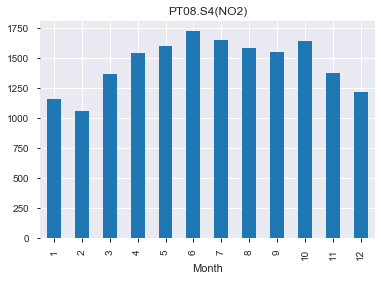

In [19]:
for column in df2.columns[2:9]:
    plt.title(column)
    df2.groupby(by = 'Month')[column].mean().plot(kind = 'bar')
    plt.show()

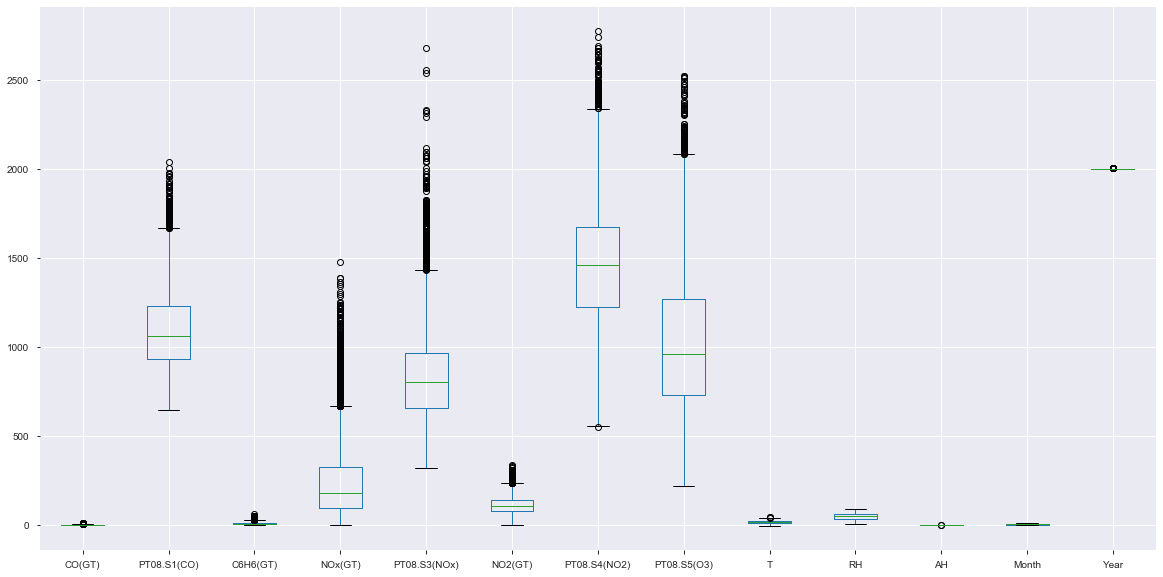

In [39]:
plt.rcParams['figure.figsize']=(20,10)
df2.boxplot()
plt.show()

## Sensor vs Analyzers Graphs

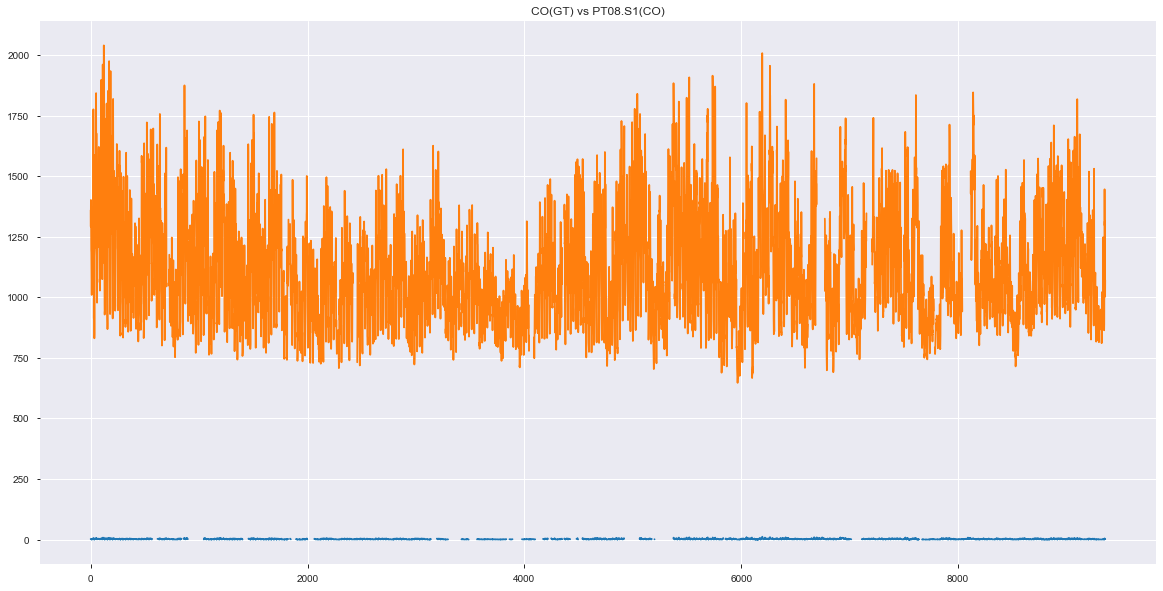

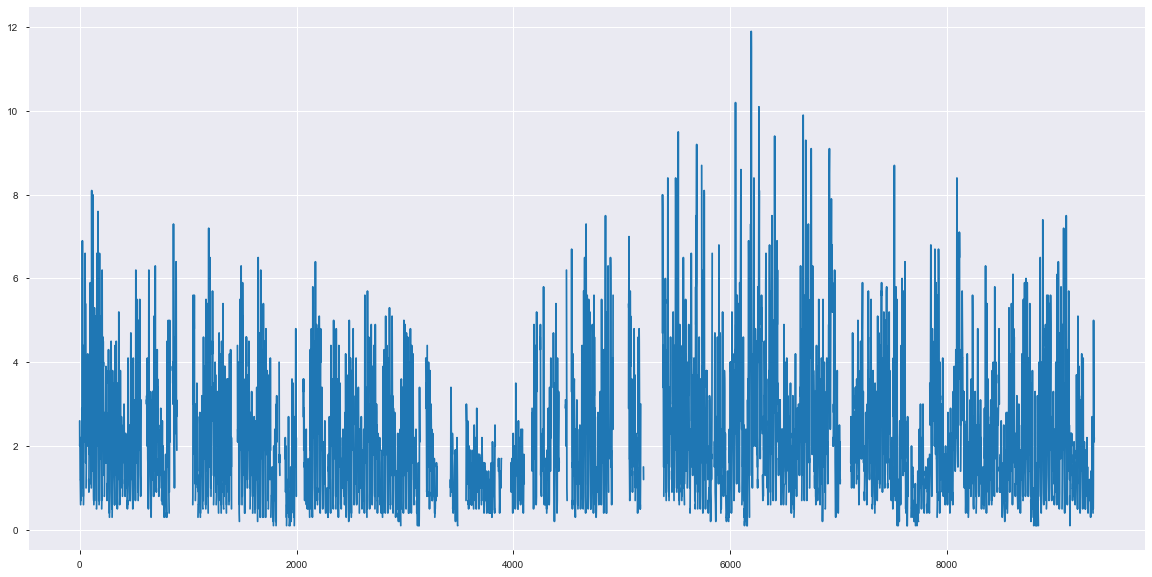

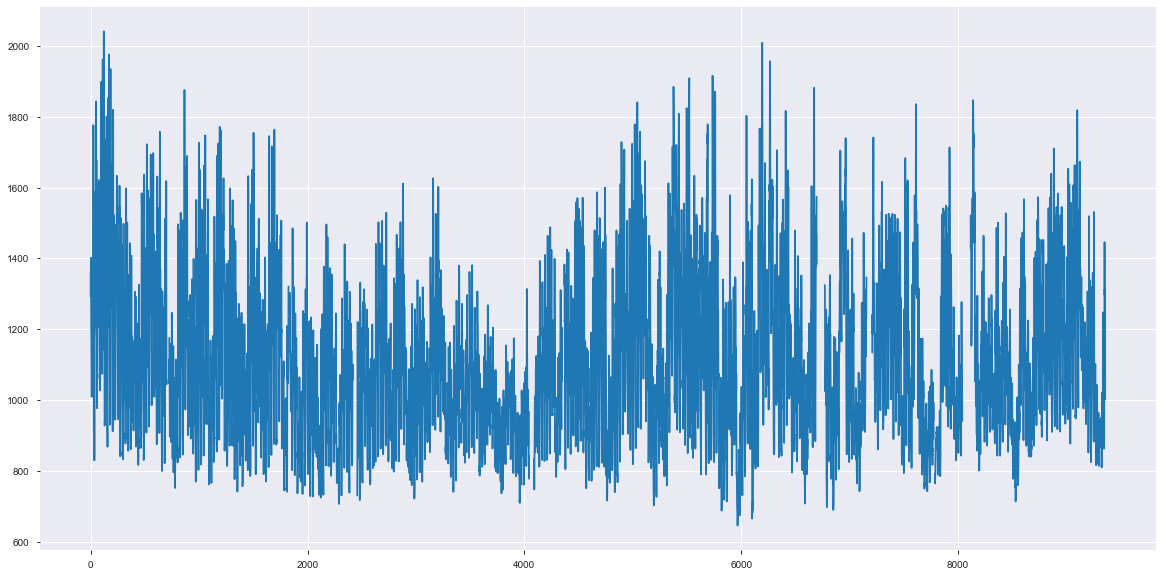

In [41]:
plt.rcParams['figure.figsize']=(20,10)
plt.title('CO(GT) vs PT08.S1(CO)')
plt.plot(df2.index,df2['CO(GT)'])
plt.plot(df2.index,df2['PT08.S1(CO)'])
plt.show()

plt.plot(df2.index,df2['CO(GT)'])
plt.show()
plt.plot(df2.index,df2['PT08.S1(CO)'])
plt.show()

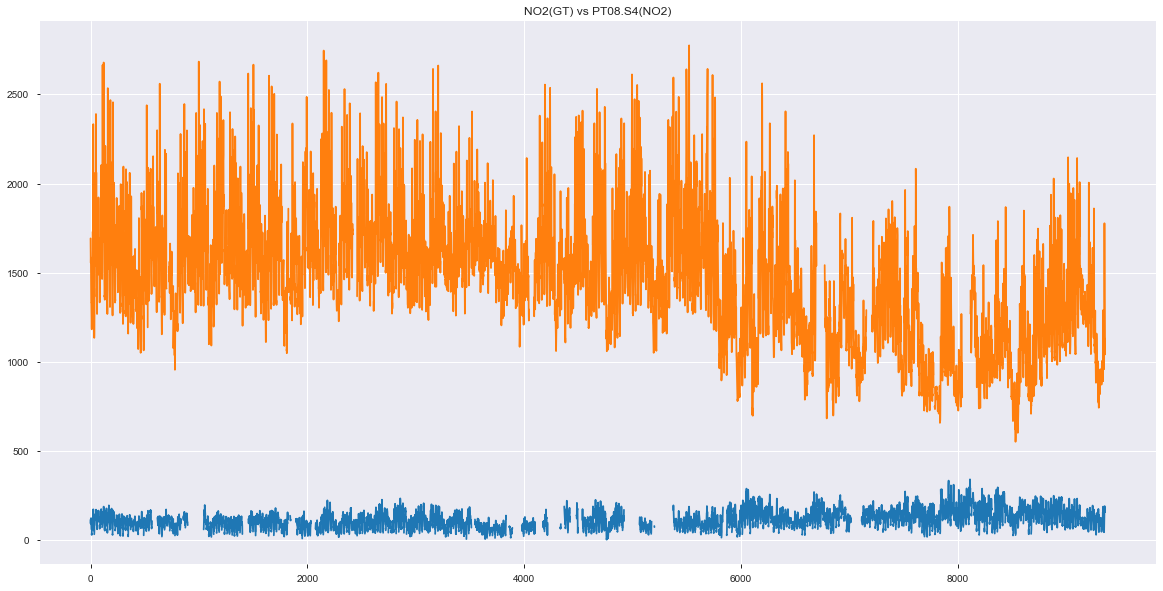

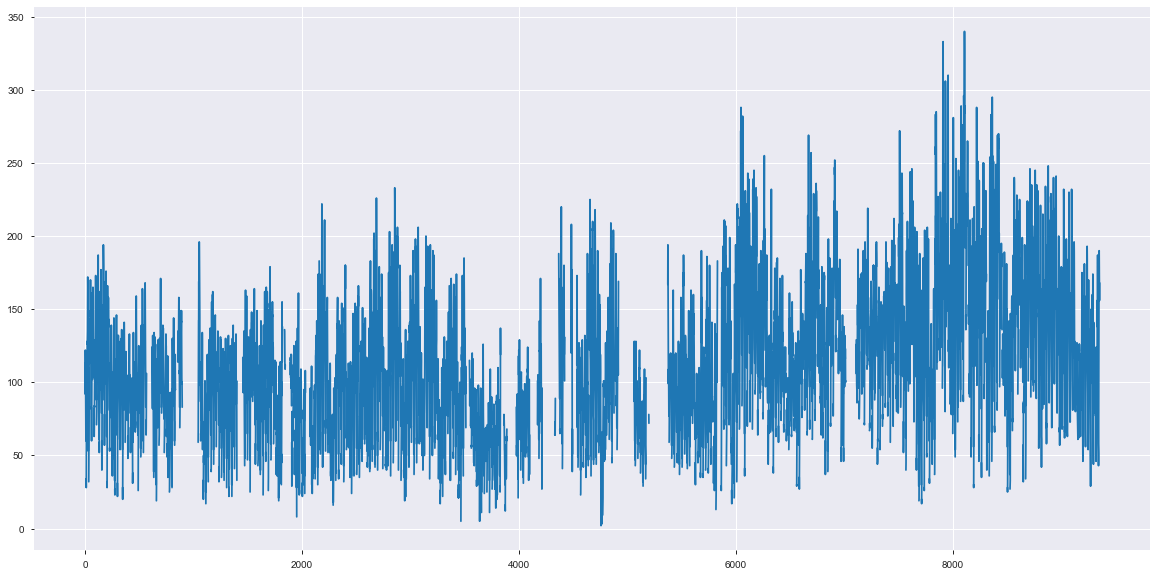

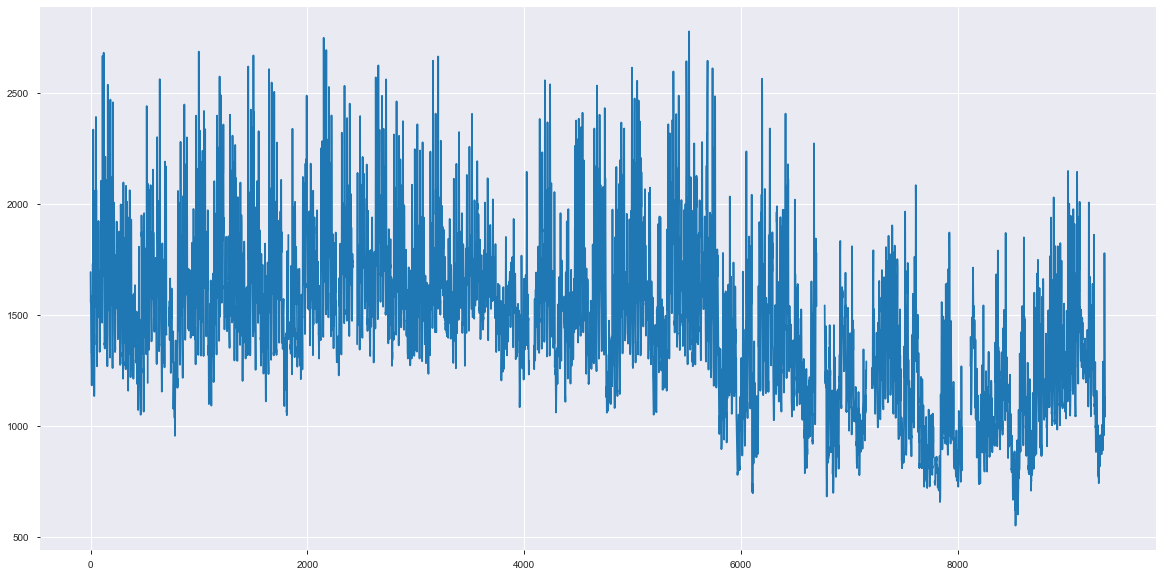

In [42]:
plt.title('NO2(GT) vs PT08.S4(NO2)')
plt.plot(df2.index,df2['NO2(GT)'])
plt.plot(df2.index,df2['PT08.S4(NO2)'])
plt.show()

plt.plot(df2.index,df2['NO2(GT)'])
plt.show()
plt.plot(df2.index,df2['PT08.S4(NO2)'])
plt.show()

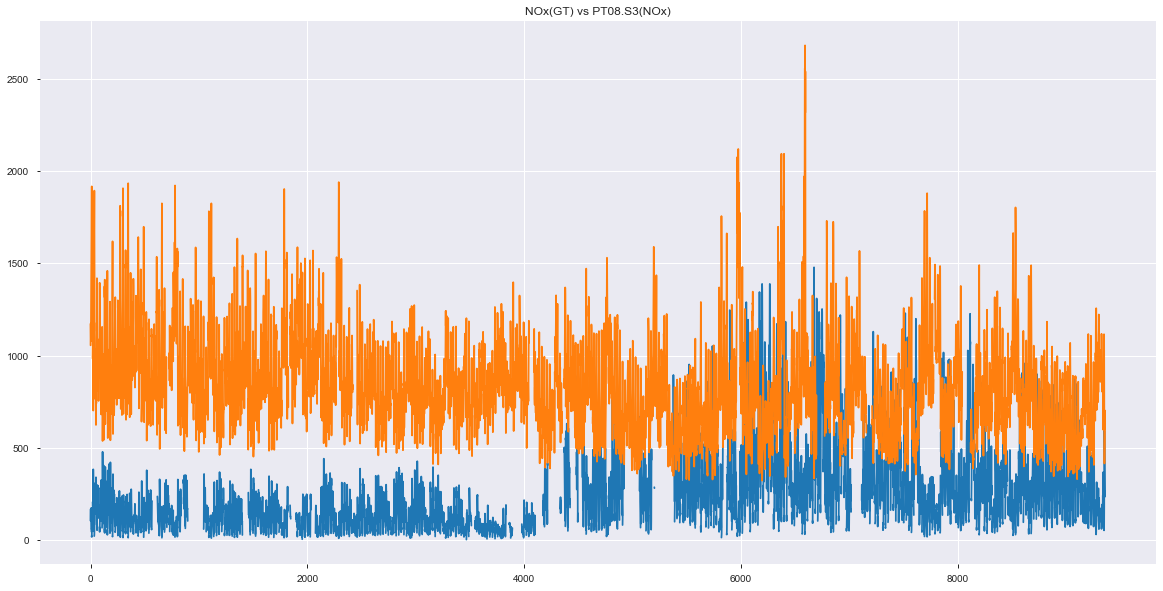

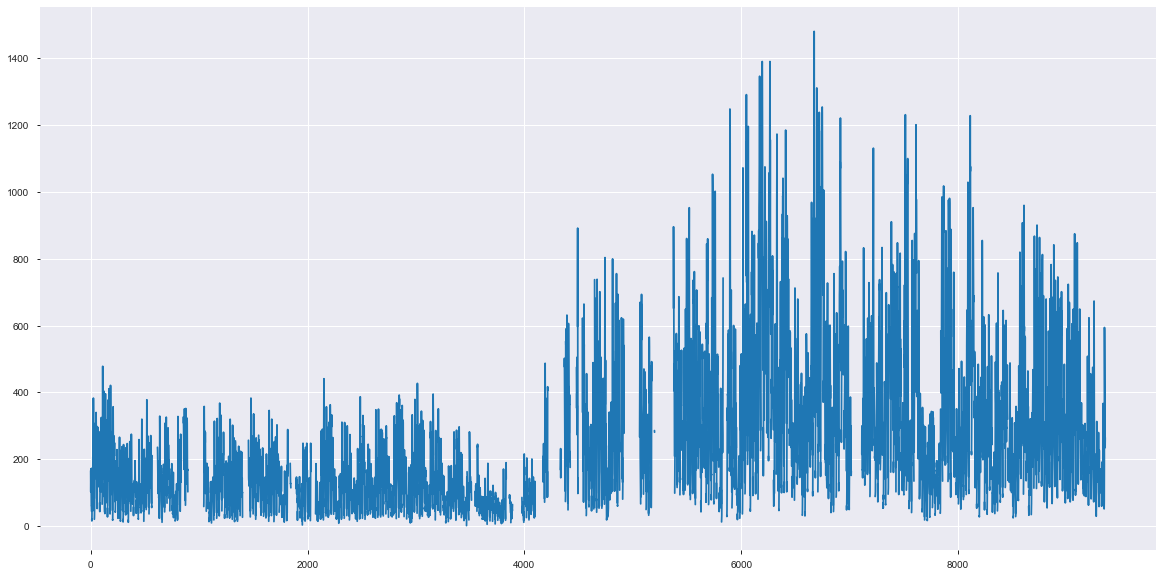

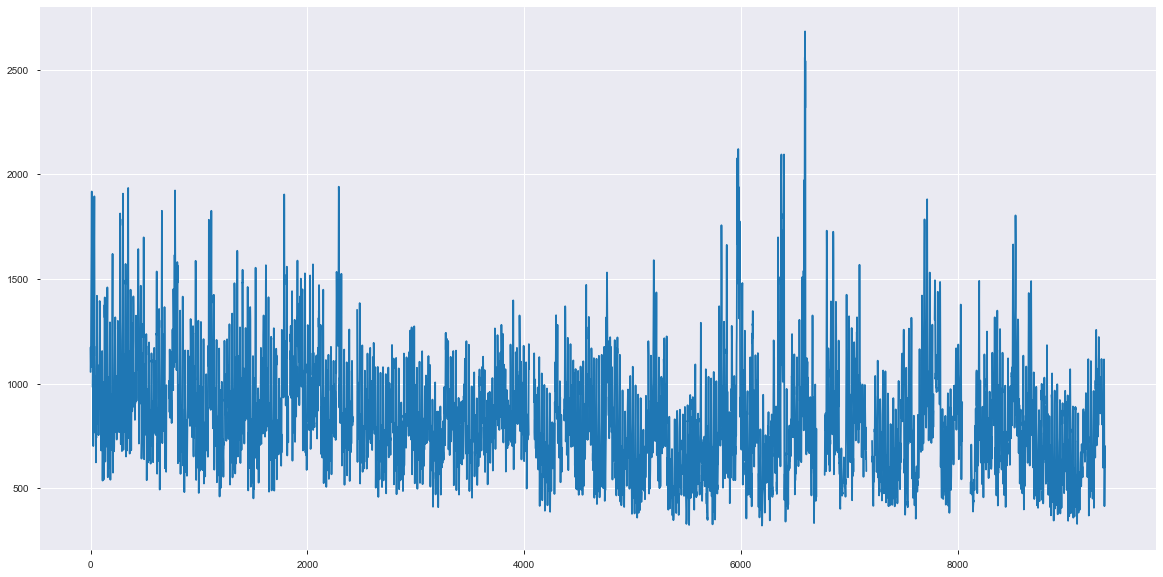

In [43]:
plt.title('NOx(GT) vs PT08.S3(NOx)')
plt.plot(df2.index,df2['NOx(GT)'])
plt.plot(df2.index,df2['PT08.S3(NOx)'])
plt.show()

plt.plot(df2.index,df2['NOx(GT)'])
plt.show()
plt.plot(df2.index,df2['PT08.S3(NOx)'])
plt.show()

## Plotting the sorted values, so we can analyze the curve of values and even maybe try to adjust the curves.(?)

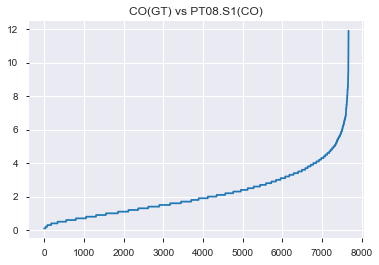

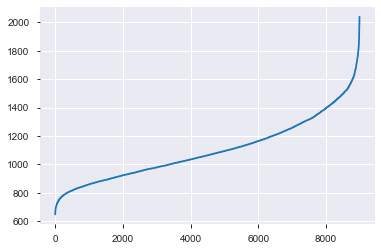

In [20]:
plt.title('CO(GT) vs PT08.S1(CO)')
plt.plot(df2.index,df2['CO(GT)'].sort_values())
plt.show()
plt.plot(df2.index,df2['PT08.S1(CO)'].sort_values())
plt.show()

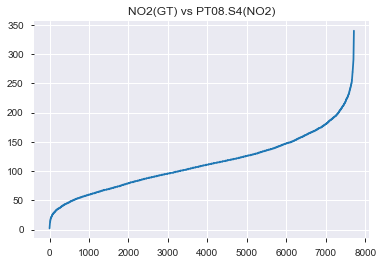

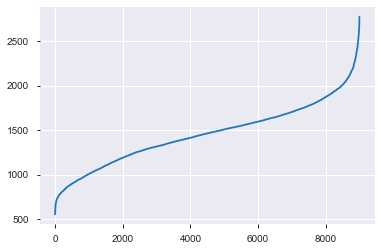

In [21]:
plt.title('NO2(GT) vs PT08.S4(NO2)')
plt.plot(df2.index,df2['NO2(GT)'].sort_values())
plt.show()
plt.plot(df2.index,df2['PT08.S4(NO2)'].sort_values())
plt.show()

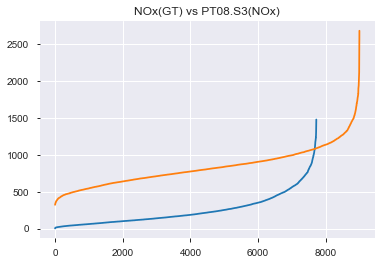

In [22]:
plt.title('NOx(GT) vs PT08.S3(NOx)')
plt.plot(df2.index,df2['NOx(GT)'].sort_values())
plt.plot(df2.index,df2['PT08.S3(NOx)'].sort_values())
plt.show()

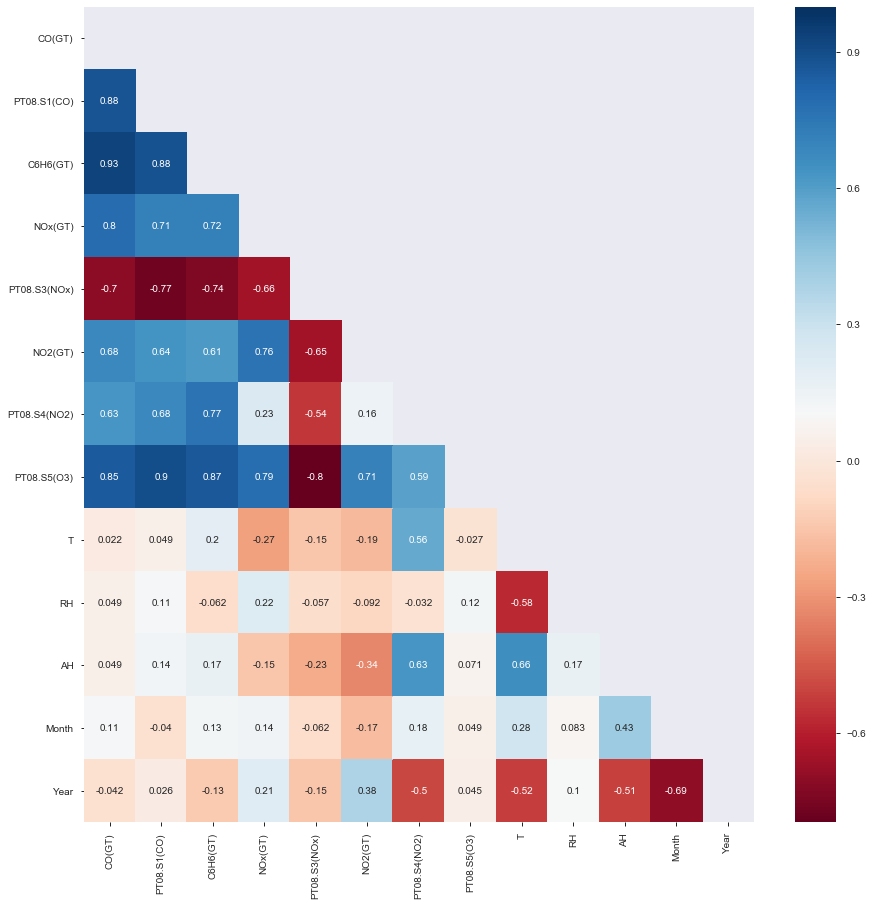

In [47]:
mtrCorre2 = df2.corr()
plt.rcParams['figure.figsize']=(15,15)
mask = np.zeros_like(mtrCorre2, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sea.heatmap(mtrCorre2, annot = True, cmap = 'RdBu', mask = mask)
plt.show()

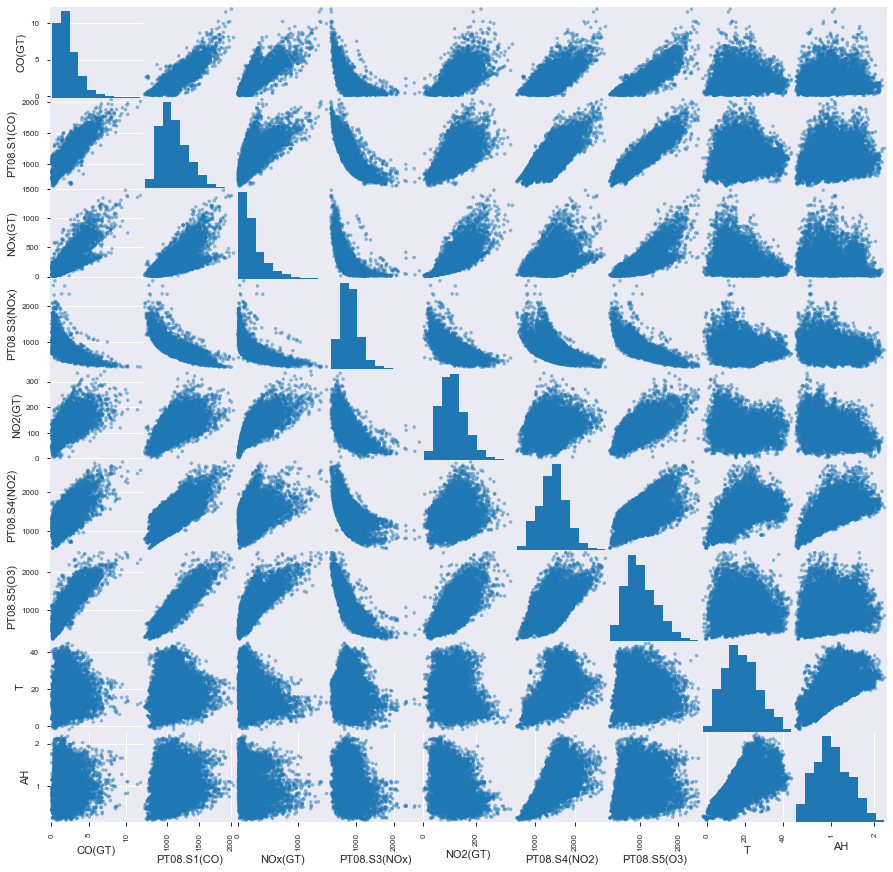

In [86]:
pd.plotting.scatter_matrix(df2.drop(columns = ['Month','Year','RH','C6H6(GT)']), figsize = (15,15))
plt.show()

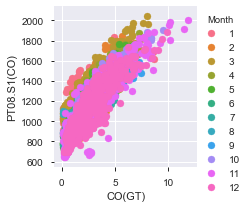

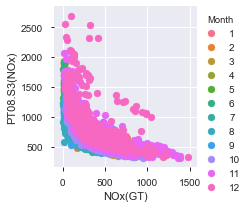

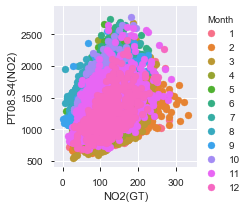

In [50]:
g = sea.FacetGrid(df2, hue = 'Month')
g = g.map(plt.scatter, 'CO(GT)', 'PT08.S1(CO)')
g = g.add_legend()
plt.show()

g = sea.FacetGrid(df2, hue = 'Month')
g = g.map(plt.scatter, 'NOx(GT)', 'PT08.S3(NOx)')
g = g.add_legend()
plt.show()

g = sea.FacetGrid(df2, hue = 'Month')
g = g.map(plt.scatter, 'NO2(GT)', 'PT08.S4(NO2)')
g = g.add_legend()
plt.show()

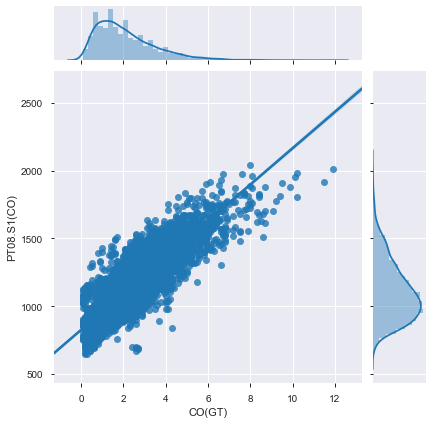

In [81]:
g = sea.JointGrid(x = 'CO(GT)', y = 'PT08.S1(CO)', data= df2)
g = g.plot(sea.regplot, sea.distplot)
plt.show()

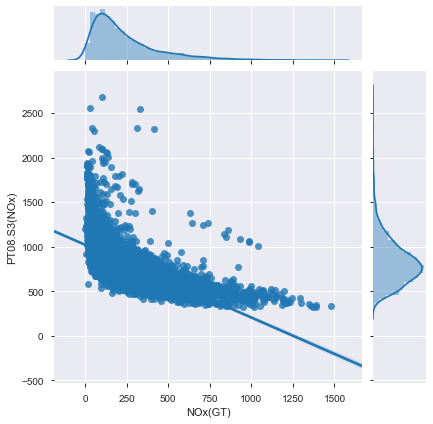

In [82]:
g = sea.JointGrid(x = 'NOx(GT)', y = 'PT08.S3(NOx)', data= df2)
g = g.plot(sea.regplot, sea.distplot)
plt.show()

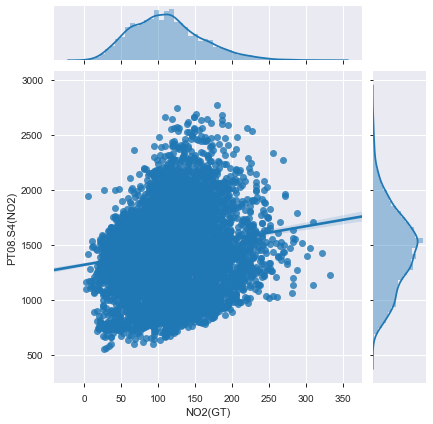

In [83]:
g = sea.JointGrid(x = 'NO2(GT)', y = 'PT08.S4(NO2)', data= df2)
g = g.plot(sea.regplot, sea.distplot)
plt.show()

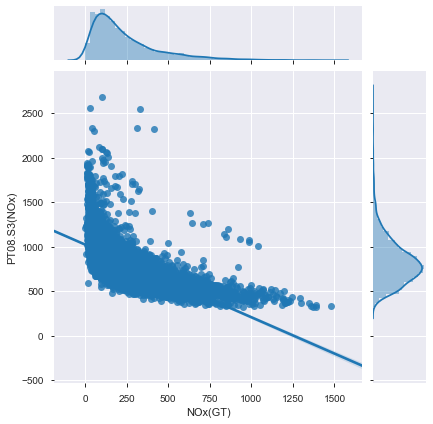

In [23]:
g = sea.JointGrid(x = 'NOx(GT)', y = 'PT08.S3(NOx)', data= df2)
g = g.plot(sea.regplot, sea.distplot)
plt.show()

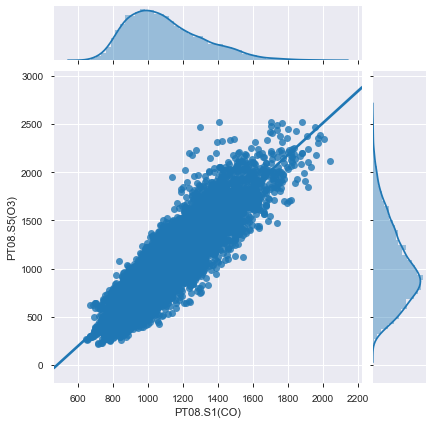

In [88]:
g = sea.JointGrid(x = 'PT08.S1(CO)', y = 'PT08.S5(O3)', data= df2)
g = g.plot(sea.regplot, sea.distplot)
plt.show()